<b>Author</b>: Danis Alukaev \
<b>Email</b>: d.alukaev@innopolis.university \
<b>Group</b>: B19-DS-01

# Lab 01: Assignment
In this assignment you're required to find whether the given numbers are prime or not using sequential and parallel processing and then compare the performance of both

## 1. Sequential processing

In [1]:
import time

In [2]:
numbers = [15492781, 15492787, 15492803, 
           15492811, 15492810, 15492833, 
           15492859, 15502547, 15520301, 15527509]

In [3]:
def is_prime(number):
    """returns True if number 
    is prime, False otherwise"""
    if number == 1:
        return False     
    for dividor in range(2, number):
        if number % dividor == 0:
            return False
    return True
    

    
if __name__ == "__main__":
    # your code here
    # 1. record the start time using time() function of time module     
    start = time.time()
    
    for number in numbers:
        # 2. print the number and 
        #    whether it is prime or not.
        #    use is_prime() function
        print(f"Number {number} is {'prime' if is_prime(number) else 'composite'}.")
        
    
    # 3. record the performance and print out
    t_seq = time.time() - start 
    
    # output the statistics     
    print(f'Time of sequential processing: {t_seq}.')

Number 15492781 is prime.
Number 15492787 is prime.
Number 15492803 is prime.
Number 15492811 is prime.
Number 15492810 is composite.
Number 15492833 is prime.
Number 15492859 is prime.
Number 15502547 is prime.
Number 15520301 is prime.
Number 15527509 is prime.
Time of sequential processing: 7.849869251251221.


## 2. Parallel processing

In [4]:
from multiprocessing import Process, Queue, current_process
from queue import Empty # exception to break from loop when the get(block=False) called on empty queue 

In [7]:
def check_prime_worker(job_queue):
    """worker function passed as target to Process"""
    while True:
        # your code here
        try:
            # 1. get next available number from queue
            number = job_queue.get(block=False)
            # 2. print the number and whether it
            # is prime or not, use is_prime()
            print(f"Number {number} is {'prime' if is_prime(number) else 'composite'}. Computed by {current_process().name}.")
        except Empty:
            # 3. use try/except to catch Empty exception 
            #    and quit the loop if no number remains in queue
            break

        
# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    job_queue = Queue()
    t_par = [] # to measure the time
    # number of processes 
    for N in range(1, len(numbers)+1):
        print(f'Number of workers: {N}...')
        # preparing the jobs to be done by workers
        for n in numbers:
            job_queue.put(n)

        # your code here

        # 1. create list of processes of N process.
        processes = [Process(target=check_prime_worker, args=(job_queue,)) for _ in range(N)]

        # 2. record the start time 
        start = time.time()
        
        # 3. start each of the processes
        [p.start() for p in processes]

        # 4. call join on each of the processes
        [p.join() for p in processes]

        # 5. measure the performance and append to the list of records
        runtime = time.time()-start
        t_par.append(runtime)
        
        # 6. close the processes
        [p.close() for p in processes]
        
        # output the statistics
        print(f'Runtime is {runtime}.\n')

Number of workers: 1...
Number 15492781 is prime. Computed by Process-57.
Number 15492787 is prime. Computed by Process-57.
Number 15492803 is prime. Computed by Process-57.
Number 15492811 is prime. Computed by Process-57.
Number 15492810 is composite. Computed by Process-57.
Number 15492833 is prime. Computed by Process-57.
Number 15492859 is prime. Computed by Process-57.
Number 15502547 is prime. Computed by Process-57.
Number 15520301 is prime. Computed by Process-57.
Number 15527509 is prime. Computed by Process-57.
Runtime is 7.828755855560303.

Number of workers: 2...
Number 15492781 is prime. Computed by Process-58.
Number 15492787 is prime. Computed by Process-59.
Number 15492811 is prime. Computed by Process-59.
Number 15492810 is composite. Computed by Process-59.
Number 15492803 is prime. Computed by Process-58.
Number 15492859 is prime. Computed by Process-58.
Number 15492833 is prime. Computed by Process-59.
Number 15502547 is prime. Computed by Process-58.
Number 155203

Bonus points will be given if you show/print the name of the process that did calculation for given number (use current_process() from multiprocessing module) 

## Bonus task.
For the sake of clarity, names of the processes were printed right after the message whether a number is prime or not. Unfortunately, because of the process' nature, messages about different numbers were printed in one line. The reason is that several processes print to standard output at the same moment. Indeed, one can use dictionary available in `multiprocessing.Manager` to collect information about processes, but it should be passed as a second argument in `check_prime_worker` as well as the current number of workers. It violates the initial signature of `check_prime_worker`, so it makes sense to show this version independently. \
In the example below, program firstly prints the messages whether numbers are prime or not and then messages about processes computed the result. This version is more readable and understandable. 

In [5]:
from multiprocessing import Manager

In [6]:
def check_prime_worker(job_queue, no_processes, info):
    """worker function passed as target to Process"""
    while True:
        # your code here
        try:
            # 1. get next available number from queue
            number = job_queue.get(block=False)
            # 2. print the number and whether it
            # is prime or not, use is_prime()
            print(f"Number {number} is {'prime' if is_prime(number) else 'composite'}.")
            info[str(N)+'-'+str(number)] = current_process().name
        except Empty:
            # 3. use try/except to catch Empty exception 
            #    and quit the loop if no number remains in queue
            break

        
# calculate if the numbers are prime or not
# measure the performance of parallel processing
if __name__ == "__main__":
    job_queue = Queue()
    manager = Manager()
    
    info = manager.dict()
    t_par = [] # to measure the time
    # number of processes 
    for N in range(1, len(numbers)+1):
        print(f'Number of workers: {N}...')
        # add number as key
        
        # preparing the jobs to be done by workers
        for n in numbers:
            job_queue.put(n)

        # your code here

        # 1. create list of processes of N process.
        processes = [Process(target=check_prime_worker, args=(job_queue, N, info)) for _ in range(N)]

        # 2. record the start time 
        start = time.time()
        
        # 3. start each of the processes
        [p.start() for p in processes]

        # 4. call join on each of the processes
        [p.join() for p in processes]

        # 5. measure the performance and append to the list of records
        runtime = time.time()-start
        t_par.append(runtime)
        
        # 6. close the processes
        [p.close() for p in processes]
        
        # output the statistics
        print(f'Runtime is {runtime}.\n')
    
    # currently keys are in the format '<workers>-<number>' 
    # use new dictionary to sistematize information
    structured = {}
    for N in range(1, len(numbers)+1):
        structured[str(N)] = {}

    for key, value in info.items():
        workers, number = key.split('-')
        structured[workers][number] = value

    for N in range(1, len(numbers)+1):
        print(f'Number of workers: {N}...')
        for number in numbers:
            print(f'Number {number} was processed by {structured[str(N)][str(number)]}.')

Number of workers: 1...
Number 15492781 is prime.
Number 15492787 is prime.
Number 15492803 is prime.
Number 15492811 is prime.
Number 15492810 is composite.
Number 15492833 is prime.
Number 15492859 is prime.
Number 15502547 is prime.
Number 15520301 is prime.
Number 15527509 is prime.
Runtime is 8.010770559310913.

Number of workers: 2...
Number 15492781 is prime.
Number 15492787 is prime.
Number 15492803 is prime.
Number 15492810 is composite.
Number 15492811 is prime.
Number 15492859 is prime.
Number 15492833 is prime.
Number 15520301 is prime.
Number 15502547 is prime.
Number 15527509 is prime.
Runtime is 4.482191801071167.

Number of workers: 3...
Number 15492781 is prime.
Number 15492787 is prime.
Number 15492810 is composite.
Number 15492803 is prime.
Number 15492833 is prime.
Number 15492859 is prime.
Number 15492811 is prime.
Number 15520301 is prime.
Number 15527509 is prime.
Number 15502547 is prime.
Runtime is 2.7778608798980713.

Number of workers: 4...
Number 15492781 is

## 3. Compare the performance of Sequential processing against Parallel processing 
Draw a simple 2D graph using matplotlib:
- X axis should be number of processes from part 2, i.e., it should have values: 1, 2, 3,.., len(numbers)
- Y axis should be ratio of "time for sequential processing" (t_seq) to a "time for parallel processing" (t_par[i-1]) when i processes are used.

Explain the results in a few sentences and what factors can affect the it?

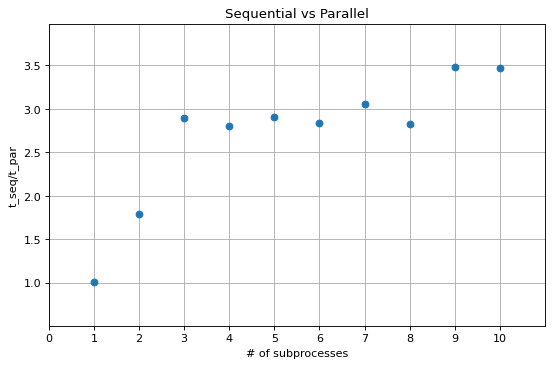

In [8]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5), dpi=80)
plt.xlim(xmin=0, xmax=len(numbers)+1)
plt.xticks(np.linspace(0,10,11))
plt.title('Sequential vs Parallel')
plt.xlabel('# of subprocesses')
plt.ylabel('t_seq/t_par')
plt.grid(linestyle='-')
ratio = np.full(10, t_seq)/t_par
plt.ylim(ymin=ratio.min()-0.5, ymax=ratio.max()+0.5)
plt.plot(np.linspace(1, 10, 10), ratio, 'o')
plt.show()

## Explanation of results
Figure above shows the performance of program using different number of subprocesses in comparison with sequential processing. Notice that the runtimes of sequential and parallel program are comparable when number of subprocesses is one, so that the ratio is approximately one. In this case, creation of subprocess does not yeild any advantage over the sequential version, because all the work still treated concurrently. The time to create subprocess is negligible compared to the computations.\
Conversely, parallel program with more than 2 subprocesses allow to perform the work on different cores simultaneously, which leads to faster program execution. Theoretically, the maximal performance reached when number of processes is greater or equal to number of CPU cores. Apparently, computations were performed on CPU with 8 cores. The maximal ratio (syn. to maximal performance) obtained with 9 subprocesses. The reason might be the presence of different system processes that were finished when the runtime was measured for 9th processes. This also explains such a plain-like ratios' arrangement for number of processes from 3 to 8: besides this processes there were other exectuted at the same time, so that system performed swapping. Another problem affecting the performance is the presence of mutual exclusion entities used for interprocess communication.\
To sum up, the parallel execution tend to be desired option to choose when creating a program handling a lot of data, however the architecture of the program getting more complicated.